In [13]:
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.nn import functional as f
from torch.autograd import Variable

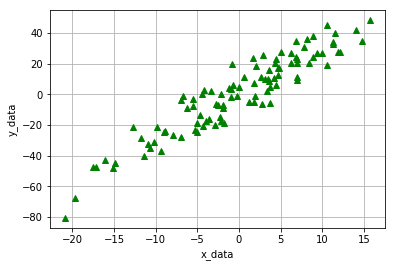

In [14]:
# Generate and print the dataset
x_data = Variable(torch.Tensor(10*torch.randn(100,1)))
y_data = 3*x_data + 10*torch.randn(100,1) + 5*torch.randn(1,1)

plt.plot(x_data.numpy(), y_data.numpy(), 'g^')
plt.ylabel('y_data')
plt.xlabel('x_data')
plt.grid()
plt.show()

In [15]:
# Define the model inheriting from nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__() 
        self.linear = nn.Linear(1, 1) # 1 input, 1 output

    # Overrides the forward pass method
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    def predict(self, x):
        return self.forward(x)

In [16]:
# Instanciate the model
model = LinearRegressionModel()

# Hyperparameters tuning
alpha = 0.01            # Learing Rate

# Construct loss function and optimizer
criterion = nn.MSELoss()                       # Mean Squared Loss
optimizer = torch.optim.SGD(model.parameters(), lr = alpha) # Stochastic Gradient Descent

Text(0.5,0,'epoch')

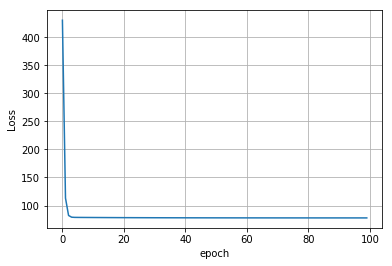

In [17]:
# Train the model
epochs = 100
losses = []

for i in range(epochs):  
    # Forward pass
    y_pred = model.forward(x_data)
    
    # Compute loss
    loss = criterion(y_pred,y_data)
    losses.append(loss)
    
    # Compute gradient and update model parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.plot(range(epochs),losses)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('epoch')

Text(0.5,0,'x')

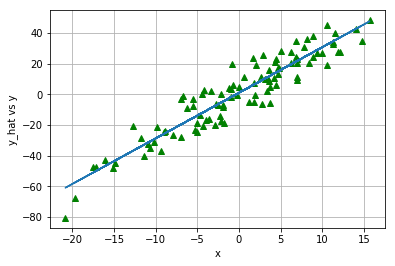

In [18]:
# Compare y_data and y_pred

y_pred = []

for x_val,y_val in zip(x_data,y_data):
    y_pred_curr = model.predict(x_val)
    y_pred.append(y_pred_curr.data)

plt.grid()
plt.plot(x_data.numpy(),y_data.numpy(), 'g^')
plt.plot(x_data.numpy(),y_pred)
plt.ylabel('y_hat vs y')
plt.xlabel('x')